In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def generate_graph(dataset):
    TRUST_GRAPH = {}
    RATINGS = {}
    RATED_BY = {}
    
    # Form trust graph
    with open(f'./{dataset}/trust_data.txt') as in_file:
        for l in in_file.readlines():
            f, t, _ = [int(v) for v in l.split()]
            if f not in TRUST_GRAPH:
                TRUST_GRAPH[f] = [t]
            else:
                TRUST_GRAPH[f].append(t)
            if t not in TRUST_GRAPH:
                TRUST_GRAPH[t] = []
                

    # Map users to their ratings
    with open(f'{dataset}/ratings_data.txt') as in_file:
        for l in in_file.readlines():
            s, m, r = [int(v) for v in l.split()]
            if s not in RATINGS:
                RATINGS[s] = {m : r}
            else:
                RATINGS[s][m] = r

            if s not in TRUST_GRAPH:
                TRUST_GRAPH[s] = []
            
            # Fulfil rated_by graph
            if m not in RATED_BY:
                RATED_BY[m] = set([s])
            else:
                RATED_BY[m].add(s)
        
        for t in TRUST_GRAPH:
            if t not in RATINGS:
                RATINGS[t] = {}
                
    return TRUST_GRAPH, RATINGS, RATED_BY

In [58]:
trust_graph, ratings, rated_by = generate_graph('epinions')

Text(0.5, 1.0, 'Epinions trust graph in-edges')

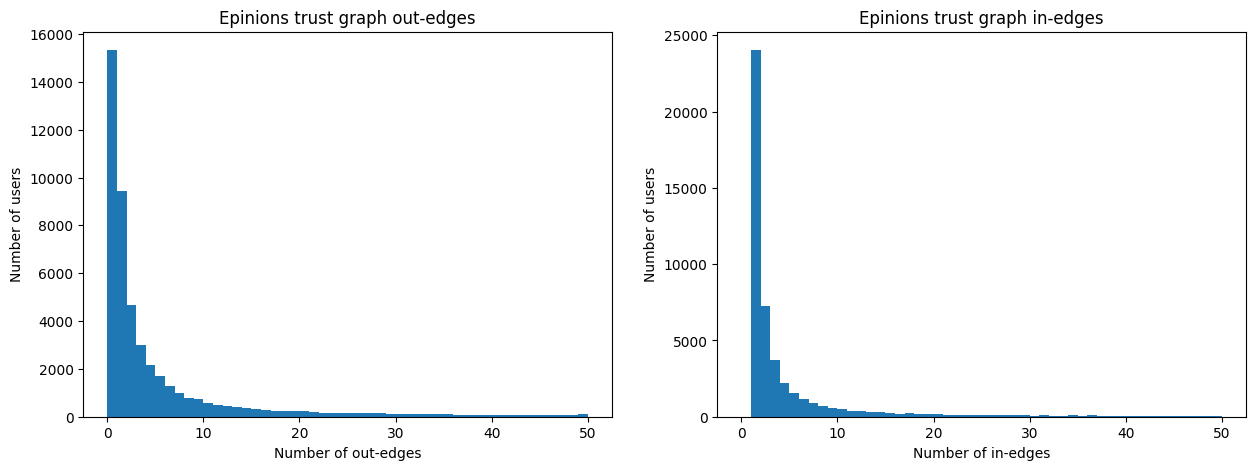

In [37]:
plt.figure(figsize=(15, 5))

# Number of out-edges
plt.subplot(1, 2, 1)
out_edges = [len(trust_graph[u]) for u in trust_graph]
plt.hist(np.array(out_edges), bins=50, range=(0, 50))
plt.xlabel('Number of out-edges')
plt.ylabel('Number of users')
plt.title('Epinions trust graph out-edges')

# Number of in-edges
plt.subplot(1,2,2)
in_counts = {u: 0 for u in trust_graph}
for u in trust_graph:
    for v in trust_graph[u]:
        in_counts[v] += 1
in_edges = list(in_counts.values())
plt.hist(np.array(in_edges), bins=50, range=(0, 50), label='in edges')
plt.xlabel('Number of in-edges')
plt.ylabel('Number of users')
plt.title('Epinions trust graph in-edges')

(array([157., 107.,  63.,  45.,  30.,  19.,  18.,  18.,  11.,   6.,   4.,
          4.,   4.,   2.,   2.,   1.,   1.,   5.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 158.  ,  206.62,  255.24,  303.86,  352.48,  401.1 ,  449.72,
         498.34,  546.96,  595.58,  644.2 ,  692.82,  741.44,  790.06,
         838.68,  887.3 ,  935.92,  984.54, 1033.16, 1081.78, 1130.4 ,
        1179.02, 1227.64, 1276.26, 1324.88, 1373.5 , 1422.12, 1470.74,
        1519.36, 1567.98, 1616.6 , 1665.22, 1713.84, 1762.46, 1811.08,
        1859.7 , 1908.32, 1956.94, 2005.56, 2054.18, 2102.8 , 2151.42,
        2200.04, 2248.66, 2297.28, 2345.9 , 2394.52, 2443.14, 2491.76,
        2540.38, 2589.  ]),
 <BarContainer object of 50 artists>)

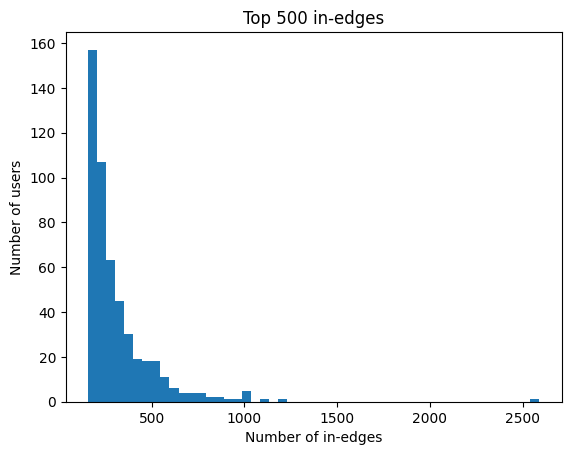

In [53]:
# Top in-edges
plt.title('Top 500 in-edges')
plt.xlabel('Number of in-edges')
plt.ylabel('Number of users')
plt.hist(sorted(in_edges)[::-1][:500], bins=50)

Text(0, 0.5, 'Number of ratings')

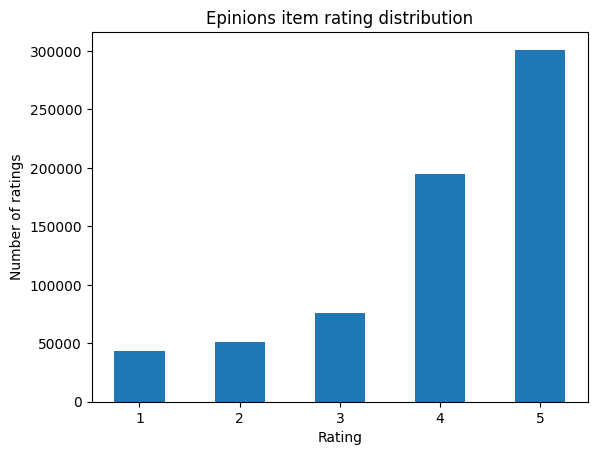

In [68]:
# Item ratings distribution
rating_values = np.array([r for u in ratings for r in ratings[u].values()])

d = 0.5
left_of_first_bin = rating_values.min() - float(d)/2
right_of_last_bin = rating_values.max() + float(d)/2
plt.hist(rating_values, np.arange(left_of_first_bin, right_of_last_bin + d, d))


plt.title('Epinions item rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')